In [12]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Preprocessing

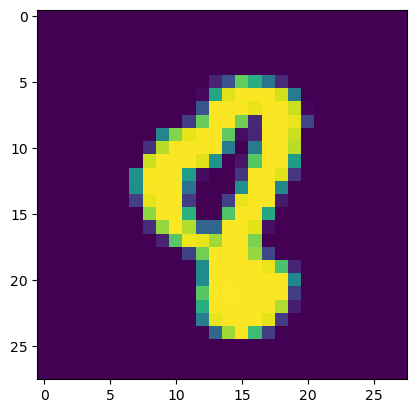

In [13]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.random.choice(range(len(x_train)))

plt.figure()
plt.imshow(x_train[ind])
plt.show()

In [14]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


# Define Model

In [15]:
inputs = tf.keras.Input(shape=(784,), name="digits")
x = tf.keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [16]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


# Train Model

In [18]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=2048,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)


Fit model on training data
Epoch 1/10
25/25 [==============================] - 0s 10ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.1046 - val_sparse_categorical_accuracy: 0.9696
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0737 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.1084 - val_sparse_categorical_accuracy: 0.9682
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9792 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9687
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0687 - sparse_categorical_accuracy: 0.9804 - val_loss: 0.1120 - val_sparse_categorical_accuracy: 0.9687
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0660 - sparse_categorical_accuracy: 0.9810 - val_loss: 0.0994 - val_sparse_categorical_accuracy: 0.9723
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.0631 - s

In [7]:
history.history

{'loss': [0.3382378816604614, 0.16195274889469147],
 'sparse_categorical_accuracy': [0.9041799902915955, 0.9514999985694885],
 'val_loss': [0.21291857957839966, 0.1603642702102661],
 'val_sparse_categorical_accuracy': [0.935699999332428, 0.9501000046730042]}